104993


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:120: RuntimeWarning: divide by zero encountered in log10


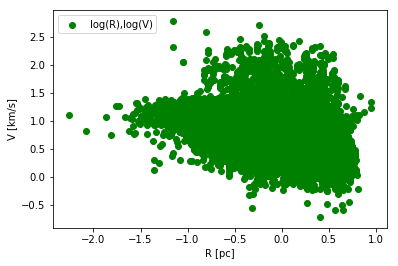

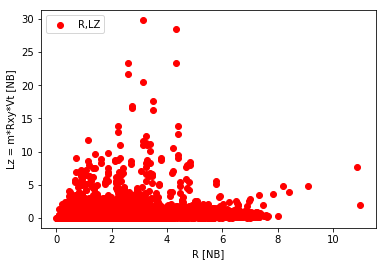

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:134: RuntimeWarning: divide by zero encountered in log10


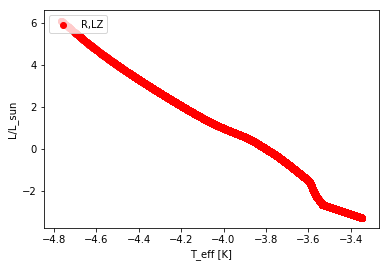

In [4]:
import h5py
import numpy as np
f =  h5py.File("snap.40_5.h5part", "r")
# print groups
#for group in f.keys():
#    print(group)
# print full list of datasets
#def printname(name):
#    print(name)
#f.visit(printname)
scalars = f['/Step#5/000 Scalars']
n = int(scalars.shape[0])
S_AS = np.zeros(n+1)
for m in range(n):
    S_AS[m+1] = scalars[m]
S_AS.shape
#
# recover scalar data as in program
TTOT = S_AS[1]
NPAIRS = int(S_AS[2])
RBAR = S_AS[3]
ZMBAR = S_AS[4]
N = int(S_AS[5])
TSTAR = S_AS[6]
RDENS = np.zeros(4)
RG = np.zeros(4)
VG = np.zeros(4)
for k in range(1,4):
    RDENS[k] = S_AS[6+k]
    RG[k] = S_AS[20+k]
    VG[k] + S_AS[23+k]
TTCR0 = S_AS[10]
TSCALE = S_AS[11]
VSTAR = S_AS[12]
RC = S_AS[13]
NC = int(S_AS[14])
VC = S_AS[15]
RHOM = S_AS[16] 
CMAX = S_AS[17] 
RSCALE = S_AS[18] 
RSMIN = S_AS[19] 
DMIN1 = S_AS[20] 
TIDAL = np.zeros(5)
for k in range(1,5):
    TIDAL[k] = S_AS[26+k]
GMG = S_AS[31] 
OMEGA = S_AS[32] 
DISK = S_AS[33] 
A = S_AS[34] 
B = S_AS[35] 
ZMET = S_AS[36] 
ZPARS = np.zeros(21)
for k in range(1,21):
    ZPARS[k] = S_AS[36+k]
ETAI = S_AS[57]
ETAR = S_AS[58]
ETAU = S_AS[59]
ECLOSE = S_AS[60]
DTMIN = S_AS[61]
RMIN = S_AS[62]
GMIN = S_AS[63]
GMAX = S_AS[64]
SMAX = S_AS[65]
NNBOPT = int(S_AS[66])
EPOCH0 = S_AS[67]
N_SINGLE = int(S_AS[68])
N_BINARY = int(S_AS[69])
N_MERGER = int(S_AS[70])

# read positions, velocities, stellar evolution data single stars
x = f['/Step#5/001 X1']
y = f['/Step#5/002 X2']
z = f['/Step#5/003 X3']
vx = f['/Step#5/004 V1']
vy = f['/Step#5/005 V2']
vz = f['/Step#5/006 V3']
mstar = f['/Step#5/023 M']
rstar = f['/Step#5/026 R*']
lstar = f['/Step#5/027 L*']
tstar = f['/Step#5/028 Teff*']
n=int(mstar.shape[0])
print(n)

# rearrange to have fortran equivalent arrays
X1 = np.zeros(n+1)
X2 = np.zeros(n+1)
X3 = np.zeros(n+1)
V1 = np.zeros(n+1)
V2 = np.zeros(n+1)
V3 = np.zeros(n+1)
BODY = np.zeros(n+1)
RADIUS =  np.zeros(n+1)
LUM =  np.zeros(n+1)
TEFF =  np.zeros(n+1)
# positions relative to density center
for m in range(n):
    X1[m+1] = x[m]-RDENS[1]
    X2[m+1] = y[m]-RDENS[2]
    X3[m+1] = z[m]-RDENS[3]
    V1[m+1] = vx[m]
    V2[m+1] = vy[m]
    V3[m+1] = vz[m]
    BODY[m+1] = mstar[m]
    RADIUS[m+1] = rstar[m]
    LUM[m+1] = lstar[m]
    TEFF[m+1] = tstar[m]
RR = np.zeros(n+1)
VV = np.zeros(n+1)
LZ = np.zeros(n+1)
LZ_spec = np.zeros(n+1)
for m in range(1,n+1):
    RR[m] = np.sqrt(X1[m]**2+X2[m]**2+X3[m]**2)
    VV[m] = np.sqrt(V1[m]**2+V2[m]**2+V3[m]**2)
    LZ_spec[m] = np.sqrt(X1[m]**2+X2[m]**2)*np.sqrt(V1[m]**2+V2[m]**2)
    LZ[m] = BODY[m]*LZ_spec[m]
RR.shape

import matplotlib.pyplot as plt
# note that data are already stored in physical units
plt.scatter(np.log10(RR), np.log10(VV), c="g", label="log(R),log(V)")
plt.xlabel("R [pc]")
plt.ylabel("V [km/s]")
plt.legend(loc='upper left')
plt.show()

# to get back N-body units multiply with scaling constants
plt.scatter(RR*RBAR, LZ_spec/(RBAR*VSTAR), c="r", label="R,LZ")
plt.xlabel("R [NB]")
plt.ylabel("Lz = m*Rxy*Vt [NB]")
plt.legend(loc='upper left')
plt.show()

# colour magnitude diagram
plt.scatter(-np.log10(TEFF), np.log10(LUM), c="r", label="R,LZ")
plt.xlabel("T_eff [K]")
plt.ylabel("L/L_sun")
plt.legend(loc='upper left')
plt.show()